In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [3]:


(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


X_train, X_test = X_train / 255.0, X_test / 255.0

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [21]:
model2 = model
model3 = model

In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model3.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
h = model.fit(x=X_train, y=Y_train, epochs=3, validation_split=0.2, batch_size=16)
h2 = model2.fit(x=X_train, y=Y_train, epochs=3, validation_split=0.2, batch_size=16)
h3 = model3.fit(x=X_train, y=Y_train, epochs=3, validation_split=0.2, batch_size=16)

Epoch 1/3
2500/2500 [==============================] - 89s 35ms/step - loss: 1.0974 - accuracy: 0.6129 - val_loss: 1.0638 - val_accuracy: 0.6286
Epoch 2/3
2500/2500 [==============================] - 76s 30ms/step - loss: 1.0130 - accuracy: 0.6448 - val_loss: 1.1091 - val_accuracy: 0.6118
Epoch 3/3
2500/2500 [==============================] - 75s 30ms/step - loss: 0.9601 - accuracy: 0.6630 - val_loss: 1.0051 - val_accuracy: 0.6548
Epoch 1/3
2500/2500 [==============================] - 78s 31ms/step - loss: 0.9193 - accuracy: 0.6794 - val_loss: 1.0355 - val_accuracy: 0.6426
Epoch 2/3
2500/2500 [==============================] - 72s 29ms/step - loss: 0.8889 - accuracy: 0.6940 - val_loss: 1.1493 - val_accuracy: 0.6261
Epoch 3/3
2500/2500 [==============================] - 73s 29ms/step - loss: 0.8698 - accuracy: 0.7028 - val_loss: 1.1618 - val_accuracy: 0.6354
Epoch 1/3
2500/2500 [==============================] - 72s 29ms/step - loss: 0.8537 - accuracy: 0.7074 - val_loss: 1.0027 - val_ac

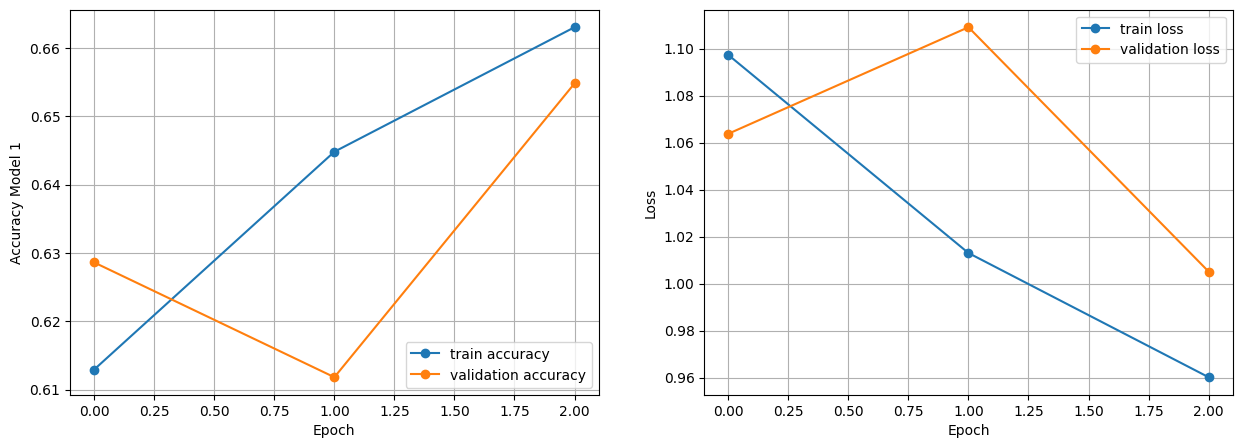

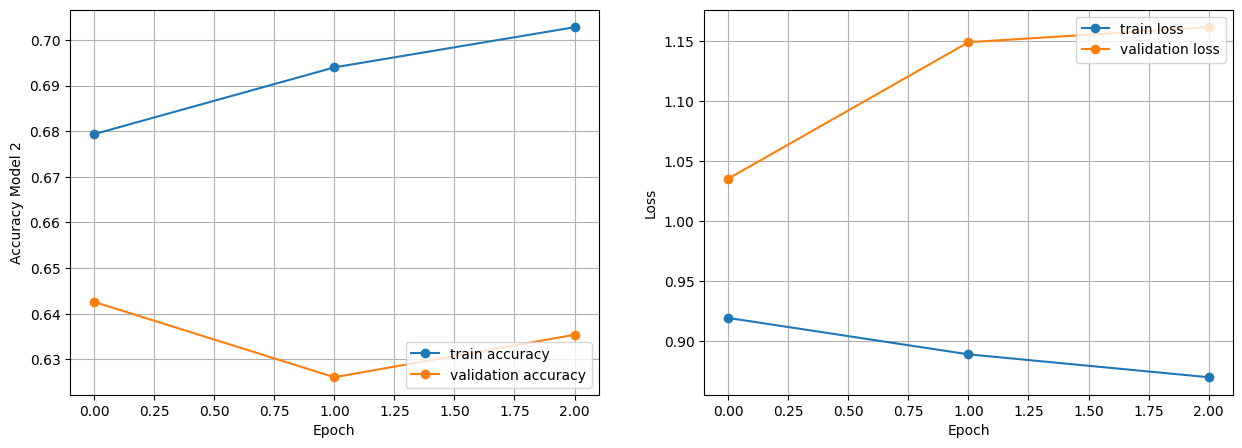

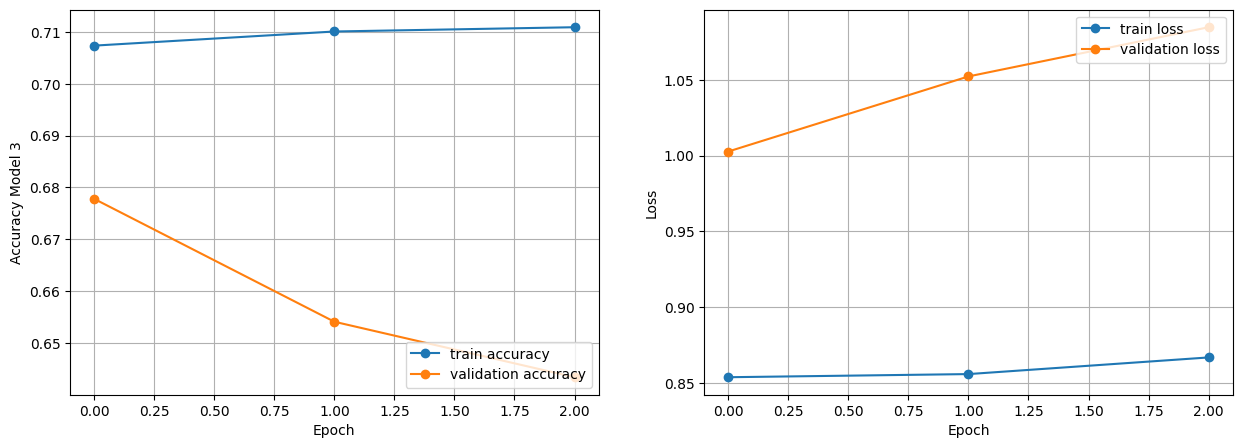

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Model 1')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Model 2')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Model 3')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [29]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy Model 1:', test_acc)
print('\nTest Loss:', test_loss)

test_loss, test_acc = model2.evaluate(X_test, Y_test)
print('\nTest Accuracy Model 2:', test_acc)
print('\nTest Loss Model 2:', test_loss)

test_loss, test_acc = model3.evaluate(X_test, Y_test)
print('\nTest Accuracy Model 3:', test_acc)
print('\nTest Loss Model 3:', test_loss)

313/313 [==============================] - 6s 19ms/step - loss: 1.0717 - accuracy: 0.6457

Test Accuracy Model 1: 0.6456999778747559

Test Loss: 1.0716588497161865
313/313 [==============================] - 4s 14ms/step - loss: 1.0717 - accuracy: 0.6457

Test Accuracy Model 2: 0.6456999778747559

Test Loss Model 2: 1.0716588497161865
313/313 [==============================] - 7s 21ms/step - loss: 1.0717 - accuracy: 0.6457

Test Accuracy Model 3: 0.6456999778747559

Test Loss Model 3: 1.0716588497161865
